In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.cm import ScalarMappable

import noise
import model_opt
import algo_GD
import helper


(array([1., 0., 0., 1., 1., 0., 3., 0., 4., 4., 3., 1., 6., 7., 3., 1., 3.,
        4., 2., 3., 0., 2., 3., 3., 8., 2., 5., 1., 7., 0., 1., 2., 1., 0.,
        2., 0., 0., 2., 3., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
        0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([-0.83630041, -0.80175255, -0.76720468, -0.73265682, -0.69810896,
        -0.6635611 , -0.62901324, -0.59446538, -0.55991752, -0.52536966,
        -0.49082179, -0.45627393, -0.42172607, -0.38717821, -0.35263035,
        -0.31808249, -0.28353463, -0.24898677, -0.21443891, -0.17989104,
        -0.14534318, -0.11079532, -0.07624746, -0.0416996 , -0.00715174,
         0.02739612,  0.06194398,  0.09649185,  0.13103971,  0.16558757,
         0.20013543,  0.23468329,  0.26923115,  0.30377901,  0.33832687,
         0.37287474,  0.4074226 ,  0.44

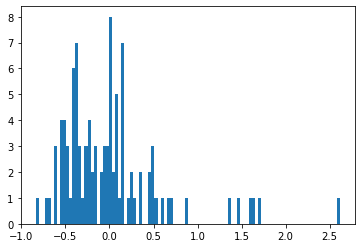

In [38]:
var = np.random.randint(100,200,1)[0]
noise_data = noise.LogNormal(mean=0,sigma=0.5,dim=2,n=100)
noise_value = noise_data.generate()

plt.hist(noise_value.T[0],bins=100)

In [56]:
w_init = np.array([3,3])
_t_max = 1000
f = model_opt.RosenBrock()


w_star = f.w_star

last_w_store = []
iqr_store = []

for i in range(2):
    var = 1
    noise_data = noise.LogNormal(mean=0,sigma=var,dim=2,n=_t_max).generate() * 80
    iqr = helper.iqr(noise_data)
    algo = algo_GD.SGD(w_init=w_init,t_max=_t_max,a=0.00078)
    for i in algo:
        noise_value = noise_data[algo.t-1]
        f = model_opt.RosenBrock(noise_value=noise_value)
        algo.update(model=f)
    last_w_store.append(algo.w)
    iqr_store.append(iqr)

In [57]:
print(iqr_store)
print(last_w_store)

[113.77197896610505, 109.84645996109613]
[array([0.62360157, 0.15052826]), array([-0.80368455,  0.8327413 ])]


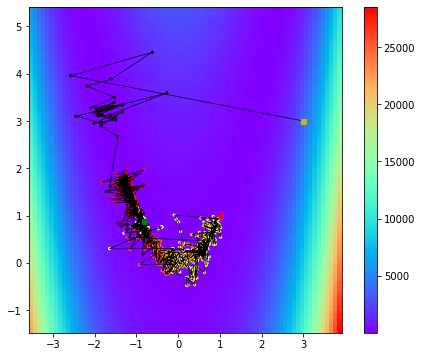

In [58]:
w_store = np.array(algo.wstore)
grid_x_min = min(w_store.T[0].min(),w_star[0])-1
grid_x_max = max(w_store.T[0].max(),w_star[0])+1
grid_y_min = min(w_store.T[1].min(),w_star[1])-1
grid_y_max = max(w_store.T[1].max(),w_star[1])+1
xvals = np.arange(grid_x_min,grid_x_max, 0.1)
yvals = np.arange(grid_y_min,grid_y_max, 0.1)
X, Y = np.meshgrid(xvals, yvals)
Z = f.f_opt([X,Y])

fig, axes = plt.subplots(1,1, figsize=(6,6))
axes.pcolor(X, Y, Z,cmap=plt.cm.rainbow)
# wの軌跡
axes.plot(w_store.T[0],w_store.T[1],c = "k",alpha=1,linewidth = 0.5)
c = np.linspace(0, _t_max, len(w_store))
axes.scatter(w_store.T[0],w_store.T[1],c=c,cmap = plt.cm.hot ,linewidths=0.01,alpha=1,s=10)
axes.plot(w_store.T[0],w_store.T[1],c="k",alpha=0.2,linewidth=1)
# 始点(黄色)、終点（緑）、真値（赤）
axes.plot(*w_store[0], 'ys', markersize=5)
axes.plot(*w_store[-1], 'gs', markersize=5)
axes.plot(*w_star, 'r*', markersize=8)

#カラーバーの設定
axpos = axes.get_position()
cbar_ax = fig.add_axes([0.9, axpos.y0, 0.03, axpos.height])
norm = colors.Normalize(vmin=Z.min(),vmax=Z.max())
mappable = ScalarMappable(cmap=plt.cm.rainbow,norm=norm)
mappable._A = []
fig.colorbar(mappable, cax=cbar_ax)

#余白の調整
plt.subplots_adjust(right=0.85)
plt.subplots_adjust(wspace=0.1)

plt.show()